In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("Project_data.csv",encoding='latin1')

## Exploratory data Analysis

In [3]:
data.head()

,Index,User.ID,Song Tital,Singer,Movie/Album,Year,Music Director,Language,Rating,duration_ms
0,4993,643,Oh Mumbai,"K. J. Yesudas, Hariharan",Millenium Stars,2012,Various Artists,Hindi,3,140693
1,10448,882,Main Kahin Bhi Rahoon,"Roop Kumar Rathod, Sukhwinder Singh, Hariharan...",L.O.C. Kargil,2003,"Anu Malik, Javed Akhtar",Hindi,2,211493
2,10449,753,Mere Yaara Dildara,"S. P. Balasubrahmanyam, Hariharan, K. S. Chithra",Kabhi Na Kabhi (Original Motion Picture Soundt...,1998,A.R. Rahman,Hindi,4,57493
3,7247,1105,College Style,"KK, Hariharan",Prema Desam,1996,A.R. Rahman,Hindi,3,202235
4,3257,1140,Bahon Ke Darmiyan - Khamoshi - The Musical / S...,"Alka Yagnik, Hariharan",Khamoshi- The Musical,1996,Various Artists,Hindi,NAN,502067


In [4]:
#checking shape of data
#calculating dimensions
rows, columns = data.shape
print('Rows = ' , rows, 'Columns =' , columns )

Rows =  15812 Columns = 10


In [5]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15812 entries, 0 to 15811
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           15812 non-null  int64 
 1   User.ID         15812 non-null  int64 
 2   Song Tital      15807 non-null  object
 3   Singer          15811 non-null  object
 4   Movie/Album     15805 non-null  object
 5   Year            15812 non-null  int64 
 6   Music Director  15758 non-null  object
 7   Language        15705 non-null  object
 8   Rating          15812 non-null  object
 9   duration_ms     15812 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.2+ MB


In [6]:
data.dtypes

Index              int64
User.ID            int64
Song Tital        object
Singer            object
Movie/Album       object
Year               int64
Music Director    object
Language          object
Rating            object
duration_ms        int64
dtype: object

# Data type conversion

In [7]:
data['Rating']=pd.to_numeric(data['Rating'],errors='coerce')

In [8]:
data.dtypes

Index               int64
User.ID             int64
Song Tital         object
Singer             object
Movie/Album        object
Year                int64
Music Director     object
Language           object
Rating            float64
duration_ms         int64
dtype: object

# Drop column 

In [9]:
data=data.drop('Index',axis=1)

## Checking For Duplicate Values

In [10]:
data[data.duplicated()].shape

(0, 9)

## Rename the column

In [11]:
#rename the column
data=data.rename({'User.ID' : 'userid', 'Movie/Album' : 'moviealbum', 'duration_ms' : 'durationms','Song Tital':'Song_title','Music Director':'Music_Director'}, axis=1)

# Visualization

<AxesSubplot:>

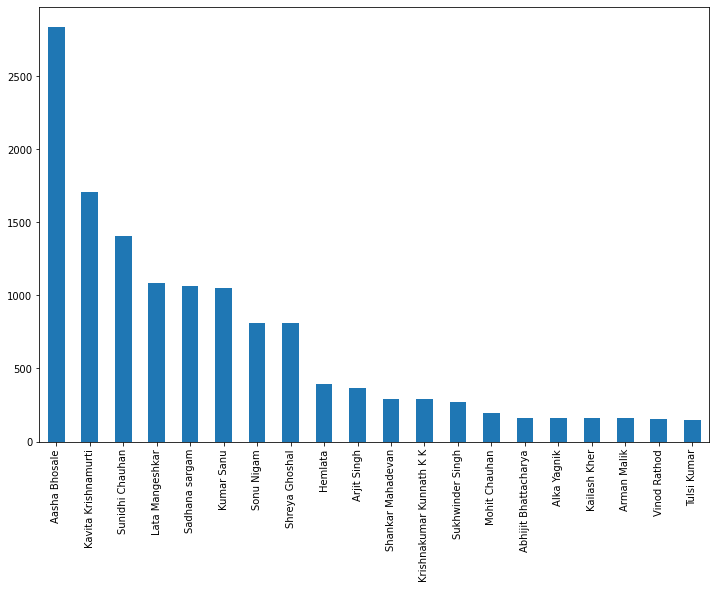

In [12]:
#fig=plt.figure(figsize=(20,8))
top=data['Singer'].value_counts()[:20]
top.plot(kind='bar',figsize=(12,8))

<AxesSubplot:>

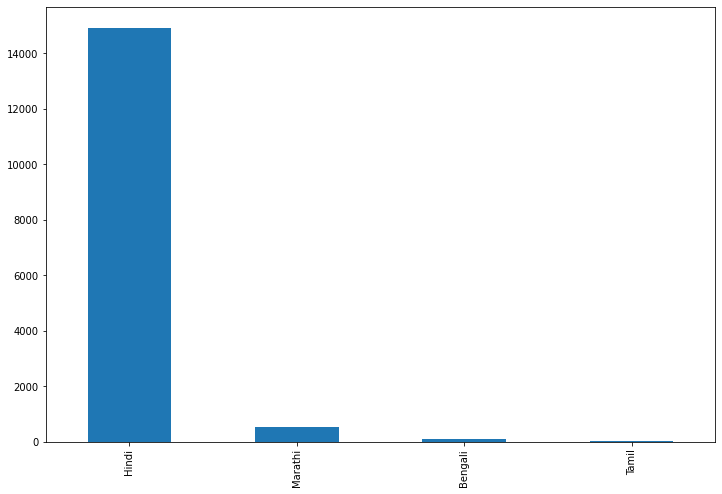

In [13]:
fig=plt.figure(figsize=(12,8))
data['Language'].value_counts()[:4].plot.bar()

<AxesSubplot:>

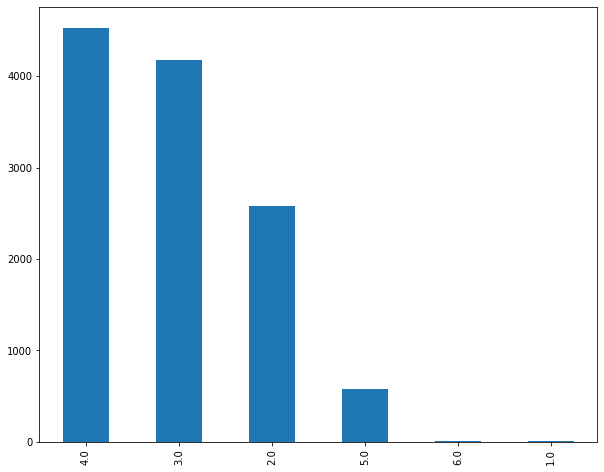

In [14]:
fig=plt.figure(figsize=(10,8))
data['Rating'].value_counts().plot.bar()

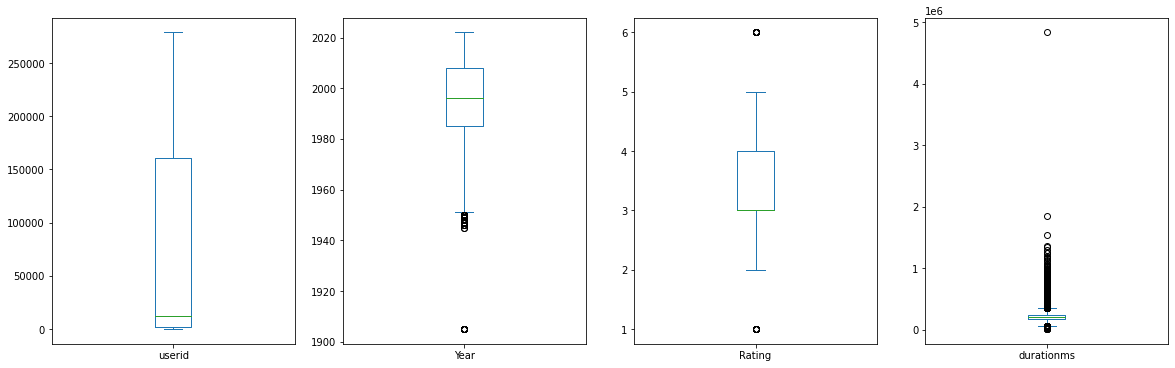

In [15]:
data.plot(kind='box', subplots= True, figsize=(20,6))
plt.show()

<AxesSubplot:>

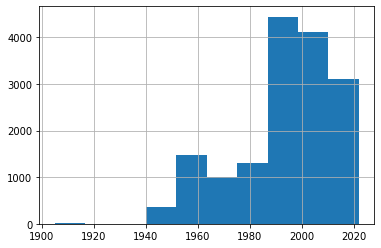

In [16]:
# histogram 
data['Year'].hist()

C:\Users\swami\anaconda3\envs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='decade', ylabel='count'>

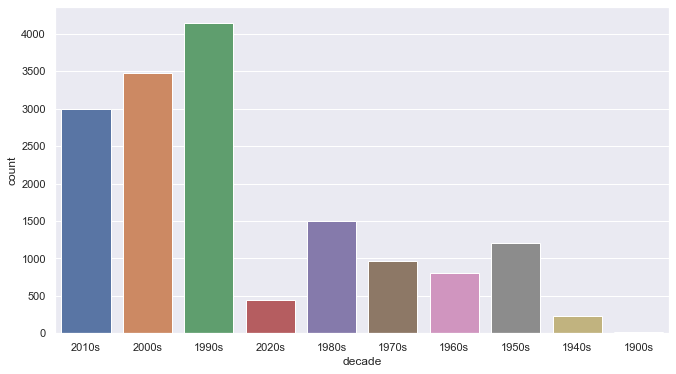

In [17]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['Year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [18]:
#checking description
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userid,15812.0,71229.557931,102884.418413,8.0,2111.0,12117.0,161041.0,278846.0
Year,15812.0,1993.848596,19.042794,1905.0,1985.0,1996.0,2008.0,2022.0
Rating,11893.0,3.261751,0.857594,1.0,3.0,3.0,4.0,6.0
durationms,15812.0,213116.594359,106770.264291,9870.0,167687.0,202038.0,238238.5,4830606.0


## Missing Values and Imputation

In [19]:
#check null values: 
data.isnull().sum()

userid               0
Song_title           5
Singer               1
moviealbum           7
Year                 0
Music_Director      54
Language           107
Rating            3919
durationms           0
decade               0
dtype: int64

<AxesSubplot:>

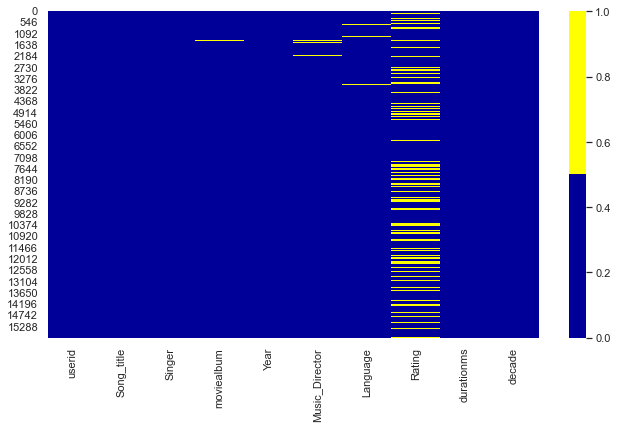

In [20]:
cols = data.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [21]:
data['Rating']=data['Rating'].fillna(data['Rating'].median())

In [22]:
data

,userid,Song_title,Singer,moviealbum,Year,Music_Director,Language,Rating,durationms,decade
0,643,Oh Mumbai,"K. J. Yesudas, Hariharan",Millenium Stars,2012,Various Artists,Hindi,3.0,140693,2010s
1,882,Main Kahin Bhi Rahoon,"Roop Kumar Rathod, Sukhwinder Singh, Hariharan...",L.O.C. Kargil,2003,"Anu Malik, Javed Akhtar",Hindi,2.0,211493,2000s
2,753,Mere Yaara Dildara,"S. P. Balasubrahmanyam, Hariharan, K. S. Chithra",Kabhi Na Kabhi (Original Motion Picture Soundt...,1998,A.R. Rahman,Hindi,4.0,57493,1990s
3,1105,College Style,"KK, Hariharan",Prema Desam,1996,A.R. Rahman,Hindi,3.0,202235,1990s
4,1140,Bahon Ke Darmiyan - Khamoshi - The Musical / S...,"Alka Yagnik, Hariharan",Khamoshi- The Musical,1996,Various Artists,Hindi,3.0,502067,1990s
...,...,...,...,...,...,...,...,...,...,...
15807,242,Tuch Sukhakarta,Prahlad Shinde,Aavad Bhajanachi,1905,Various Artists,Marathi,3.0,199272,1900s
15808,1050,Ishkkachi Nauka,"Shubhangi Kedar, Keval Walanj",Ishkkachi Nauka,1905,"Shubhangi Kedar, Keval Walanj",Marathi,2.0,277413,1900s
15809,651,O' Raaje,Sukhwinder Singh,Mee Shivajiraje Bhosale Boltoy (Original Motio...,1905,Ajit - Sameer - Atul,Marathi,3.0,161571,1900s
15810,643,Pahile Nabi Tula,Suresh Wadkar,Marathi Film & Modern Songs,1905,Anil Arun,Marathi,3.0,138760,1900s


In [23]:
data['Language']=data['Language'].fillna('Hindi')

In [24]:
data.isnull().sum()

userid             0
Song_title         5
Singer             1
moviealbum         7
Year               0
Music_Director    54
Language           0
Rating             0
durationms         0
decade             0
dtype: int64

In [25]:
data=data.dropna()

In [26]:
data

,userid,Song_title,Singer,moviealbum,Year,Music_Director,Language,Rating,durationms,decade
0,643,Oh Mumbai,"K. J. Yesudas, Hariharan",Millenium Stars,2012,Various Artists,Hindi,3.0,140693,2010s
1,882,Main Kahin Bhi Rahoon,"Roop Kumar Rathod, Sukhwinder Singh, Hariharan...",L.O.C. Kargil,2003,"Anu Malik, Javed Akhtar",Hindi,2.0,211493,2000s
2,753,Mere Yaara Dildara,"S. P. Balasubrahmanyam, Hariharan, K. S. Chithra",Kabhi Na Kabhi (Original Motion Picture Soundt...,1998,A.R. Rahman,Hindi,4.0,57493,1990s
3,1105,College Style,"KK, Hariharan",Prema Desam,1996,A.R. Rahman,Hindi,3.0,202235,1990s
4,1140,Bahon Ke Darmiyan - Khamoshi - The Musical / S...,"Alka Yagnik, Hariharan",Khamoshi- The Musical,1996,Various Artists,Hindi,3.0,502067,1990s
...,...,...,...,...,...,...,...,...,...,...
15807,242,Tuch Sukhakarta,Prahlad Shinde,Aavad Bhajanachi,1905,Various Artists,Marathi,3.0,199272,1900s
15808,1050,Ishkkachi Nauka,"Shubhangi Kedar, Keval Walanj",Ishkkachi Nauka,1905,"Shubhangi Kedar, Keval Walanj",Marathi,2.0,277413,1900s
15809,651,O' Raaje,Sukhwinder Singh,Mee Shivajiraje Bhosale Boltoy (Original Motio...,1905,Ajit - Sameer - Atul,Marathi,3.0,161571,1900s
15810,643,Pahile Nabi Tula,Suresh Wadkar,Marathi Film & Modern Songs,1905,Anil Arun,Marathi,3.0,138760,1900s


In [27]:
data.isnull().sum()

userid            0
Song_title        0
Singer            0
moviealbum        0
Year              0
Music_Director    0
Language          0
Rating            0
durationms        0
decade            0
dtype: int64

# scatter plot and correlation analysis

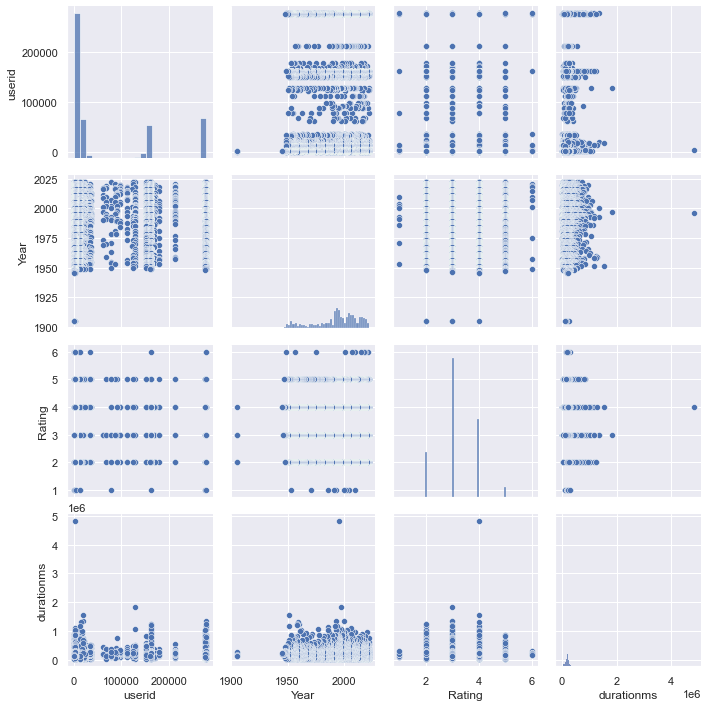

In [28]:
import seaborn as sns
sns.pairplot(data)

In [29]:
#Correlation
data2=data.corr()
data2

,userid,Year,Rating,durationms
userid,1.000000,0.059013,0.000278,0.021344
Year,0.059013,1.000000,-0.012396,0.020185
Rating,0.000278,-0.012396,1.000000,0.001324
durationms,0.021344,0.020185,0.001324,1.000000


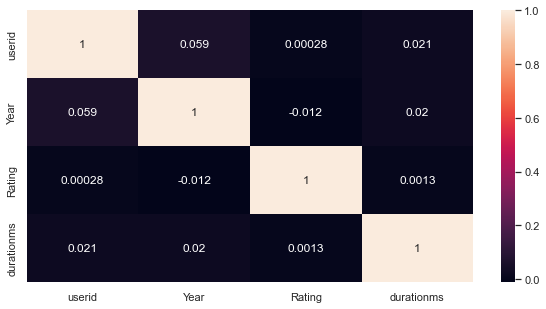

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(data2,annot=True)
plt.show()

In [31]:
len(data.userid.unique())

2499

In [32]:
len(data.Song_title.unique())

14216

In [33]:
data=data.drop_duplicates(['userid'])
user_data=data.pivot(index='Song_title',
                     columns='userid',
                     values='Rating')

In [34]:
user_data

userid,8,9,10,12,14,16,17,19,22,26,...,278820,278823,278824,278825,278828,278832,278836,278843,278844,278846
Song_title,,,,,,,,,,,,,,,,,,,,,
""" Labon Pe Naam (Film version)""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Aaj Kisi Ki Jeet Hui Hai""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Aaj Main Ho Gayi Jawaan""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Aaj Mein Boond Hoon""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Aaj Mere Paas Rehna""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zingaat,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zubaan Zubaan Pe Hogi,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zulato Bai Ras Zula,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
user_data.fillna(3.26,inplace=True)

In [36]:
user_data

userid,8,9,10,12,14,16,17,19,22,26,...,278820,278823,278824,278825,278828,278832,278836,278843,278844,278846
Song_title,,,,,,,,,,,,,,,,,,,,,
""" Labon Pe Naam (Film version)""",3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,...,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26
"""Aaj Kisi Ki Jeet Hui Hai""",3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,...,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26
"""Aaj Main Ho Gayi Jawaan""",3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,...,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26
"""Aaj Mein Boond Hoon""",3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,...,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26
"""Aaj Mere Paas Rehna""",3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,...,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zingaat,3.26,3.26,3.26,4.00,3.26,3.26,3.26,3.26,3.26,3.26,...,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26
Zubaan Zubaan Pe Hogi,3.26,3.26,3.00,3.26,3.26,3.26,3.26,3.26,3.26,3.26,...,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26
Zulato Bai Ras Zula,3.26,3.00,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,...,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26,3.26


In [37]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
similarity_scores=cosine_similarity(user_data)

In [39]:
similarity_scores.shape

(2351, 2351)

In [40]:
def recommend(Song_title):
    #index fetch
    index=np.where(user_data.index==Song_title)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    df=[]
    for i in similar_items:
       item=[]
       temp_df=(data[data['Song_title']==user_data.index[i[0]]])
       item.extend(list(temp_df.drop_duplicates('Song_title')['Song_title'].values))
       item.extend(list(temp_df.drop_duplicates('Song_title')['Singer'].values))
       item.extend(list(temp_df.drop_duplicates('Song_title')['moviealbum'].values))
        
       df.append(item)
    
    return df

In [41]:
recommend('Dheere Dheere')

[['" Labon Pe Naam (Film version)"', 'Arman Malik', 'Radhe Shyam'],
 ['"Aaj Kisi Ki Jeet Hui Hai"', 'Kavita Krishnamurti', 'Mard'],
 ['"Aaj Main Ho Gayi Jawaan"', 'Shreya Ghoshal', 'Mod'],
 ['"Aaj Mere Paas Rehna"', 'Kumar Sanu', 'Sanam Tere Hain Hum'],
 ['"Aaj Mile Ho Kal Phir"', 'Kumar Sanu', 'Stuntman']]

# Another same model for Deployment

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=15748,stop_words='english')

In [45]:
vector = cv.fit_transform(data['moviealbum']).toarray()

In [46]:
vector.shape

(2499, 2416)

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [48]:
similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [51]:
def recommend(Song_title):
    index = data[data['Song_title'] == Song_title].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(data.iloc[i[0]].Song_title)
        

In [52]:
recommend('Oh Mumbai')

Main Kahin Bhi Rahoon
Mere Yaara Dildara
College Style
Bahon Ke Darmiyan - Khamoshi - The Musical / Soundtrack Version
"Barsha Rani Ra Gelhi Jhia"


In [53]:
import streamlit as st
import pickle

In [55]:
data.to_dict()

{'userid': {0: 643,
  1: 882,
  2: 753,
  3: 1105,
  4: 1140,
  5: 2784,
  7: 2110,
  8: 1065,
  9: 1135,
  10: 1114,
  11: 254,
  12: 3146,
  13: 2844,
  14: 161936,
  15: 321,
  16: 3471,
  17: 3251,
  20: 3167,
  21: 161971,
  22: 161480,
  23: 161265,
  24: 21356,
  25: 19841,
  26: 13828,
  28: 13827,
  29: 13525,
  30: 13498,
  31: 13246,
  34: 12411,
  35: 4157,
  36: 276861,
  37: 277427,
  38: 276928,
  39: 3757,
  40: 156311,
  42: 1095,
  43: 1050,
  44: 929,
  45: 651,
  47: 392,
  49: 2365,
  50: 2341,
  51: 12205,
  52: 162052,
  53: 424,
  54: 70,
  55: 625,
  56: 1070,
  58: 408,
  59: 566,
  62: 183,
  63: 151234,
  64: 128903,
  65: 4309,
  67: 161259,
  68: 161041,
  70: 2276,
  71: 2033,
  72: 1130,
  73: 12202,
  74: 1260,
  76: 278543,
  80: 23516,
  81: 1100,
  83: 641,
  85: 276837,
  88: 161857,
  90: 13524,
  92: 1485,
  93: 13533,
  94: 1650,
  95: 1380,
  96: 735,
  98: 78612,
  99: 2789,
  100: 276847,
  101: 3923,
  102: 277179,
  104: 1733,
  108: 123675,

In [56]:
pickle.dump(data.to_dict(),open('song_dict1.pkl','wb'))

In [57]:
pickle.dump(similarity,open('similarity11.pkl','wb'))